In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

In [0]:
ratings = pd.read_csv('/content/drive/My Drive/ml-latest-small/ratings.csv',  encoding='latin-1')
tags = pd.read_csv('/content/drive/My Drive/ml-latest-small/tags.csv',  encoding='latin-1')
links = pd.read_csv('/content/drive/My Drive/ml-latest-small/links.csv',  encoding='latin-1')
movies = pd.read_csv('/content/drive/My Drive/TSEC/ml-latest/movies.csv', encoding='latin-1')

In [0]:
def send_img(x,ratings):
  df = ratings.copy()
  for i in range(0,len(df)) :
     df["timestamp"][i] =  datetime.fromtimestamp(df["timestamp"][i]).year
  rt = df[df["movieId"]==x] 
  a = rt.groupby(('movieId','timestamp'))["rating"].sum()  
  a = pd.DataFrame(a).reset_index()
  a.reset_index().drop("movieId",axis=1,inplace=True)
  fig = plt.figure()
  plt.xlabel('Year')
  plt.ylabel('Total Ratings') 
  plt.title('Movie Popularity vs Time')
  plt.stackplot(a["timestamp"],a["rating"])
  fig.savefig('plot.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


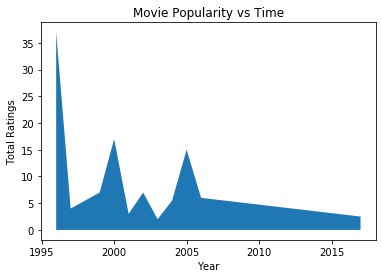

In [0]:
send_img(45,ratings)

In [0]:
df = movies.copy()
df['genres'] = df.genres.str.split('|')
moviesWithGenres_df = df.copy()
for index, row in df.iterrows():
  for genre in row['genres']:
      moviesWithGenres_df.at[index, genre] = 1
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df = moviesWithGenres_df.drop("genres",axis=1)
moviesWithGenres_df.head()

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dfx = moviesWithGenres_df[moviesWithGenres_df["Comedy"]==1]
dfx = dfx.merge(ratings,on="movieId")
for i in range(0,len(dfx)) :
     dfx["timestamp"][i] =  datetime.fromtimestamp(dfx["timestamp"][i]).year
dfx.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),userId,rating,timestamp
0,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,2000
1,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4.0,1996
2,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4.5,2005
3,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,2.5,2017
4,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,4.5,2011


In [0]:
a = pd.DataFrame(dfx.groupby(['timestamp'])["rating"].sum()).reset_index()
a.reset_index()
a.head()

,timestamp,rating
0,1996,7707.0
1,1997,2623.0
2,1998,487.0
3,1999,3725.0
4,2000,13234.0


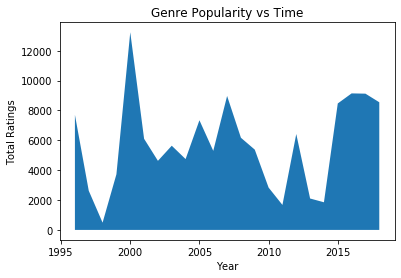

In [0]:
fig = plt.figure()
plt.xlabel('Year')
plt.ylabel('Total Ratings')
plt.title('Genre Popularity vs Time')
plt.stackplot(a["timestamp"],a["rating"])
fig.savefig('plot.png')

In [0]:
genre_df = moviesWithGenres_df.merge(ratings,on="movieId")
genre_df.head()

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),userId,rating,timestamp
0,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,964982703
1,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4.0,847434962
2,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4.5,1106635946
3,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,2.5,1510577970
4,1,Toy Story (1995),1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,4.5,1305696483


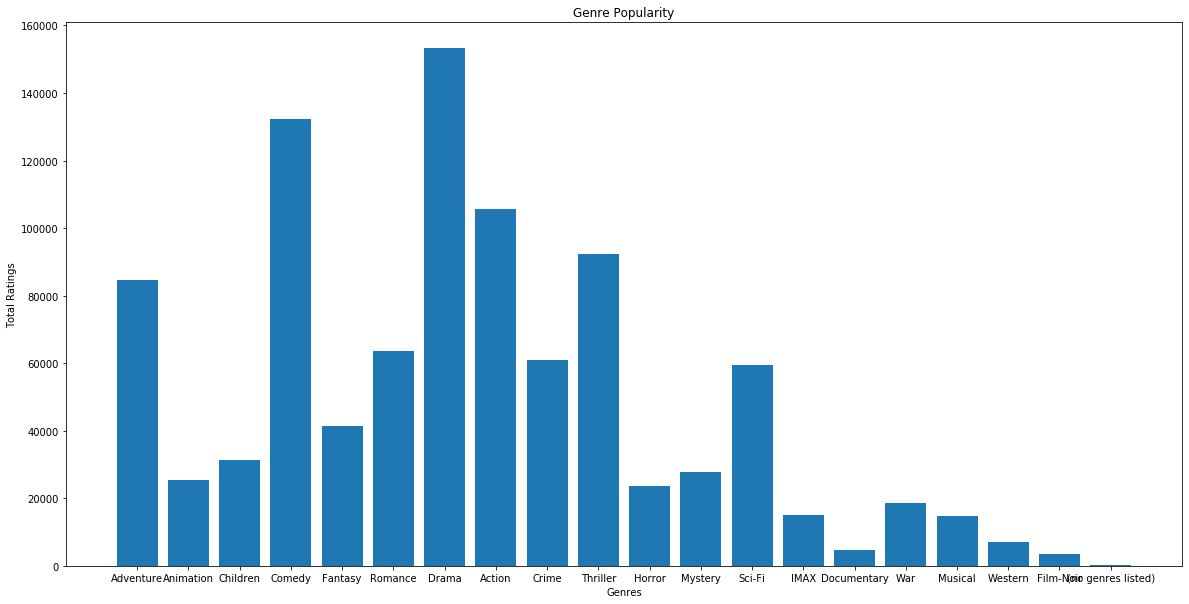

In [0]:
xxxx = genre_df.drop(['movieId', 'title', 'userId', 'timestamp'], axis=1)

columns = []
ratingSum = []

for column in xxxx:
    columns.append(column)
    ratingSum.append(xxxx.groupby(column)['rating'].sum()[1])
fig = plt.figure(figsize=(20,10))
plt.xlabel('Genres')
plt.ylabel('Total Ratings')
plt.title('Genre Popularity')
plt.bar(columns[:-1],ratingSum[:-1])
fig.savefig('plot.png')